**Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

**Read the Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata.csv to movie_metadata (2).csv


In [3]:
Data = pd.read_csv('movie_metadata.csv')
Data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Understanding Data**

In [4]:
#Information of the dataset with respect to each column
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#Number of null values in each column in the dataset
Data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
#Descriptive statistics of the numerical variables
Data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
#Number of unique values in each column
Data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [8]:
#Different objects in column color and count of each of them
Data['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [9]:
#Different language of movies and count of number of movies in respective languages in the dataset
Data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [10]:
#Title of movies in the dataset
Data['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [11]:
#Movie scores with imdb scores greater than or equal to 7
scores = Data.imdb_score[Data.imdb_score>=7]

In [12]:
#Movie Titles with imdb scores greater than or equal to 7
names = Data.movie_title[Data.imdb_score>=7]

In [13]:
#Movie Genre with imdb scores greater than or equal to 7
genre = Data.genres[Data.imdb_score>=7]

In [14]:
MovieRatings = pd.concat([names,genre,scores],axis = 1)
MovieRatings

,movie_title,genres,imdb_score
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,7.1
3,The Dark Knight Rises,Action|Thriller,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,7.1
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,7.8
...,...,...,...
5029,The Cure,Crime|Horror|Mystery|Thriller,7.4
5033,Primer,Drama|Sci-Fi|Thriller,7.0
5036,The Mongol King,Crime|Drama,7.8
5038,Signed Sealed Delivered,Comedy|Drama,7.7


**Data Visualisation**

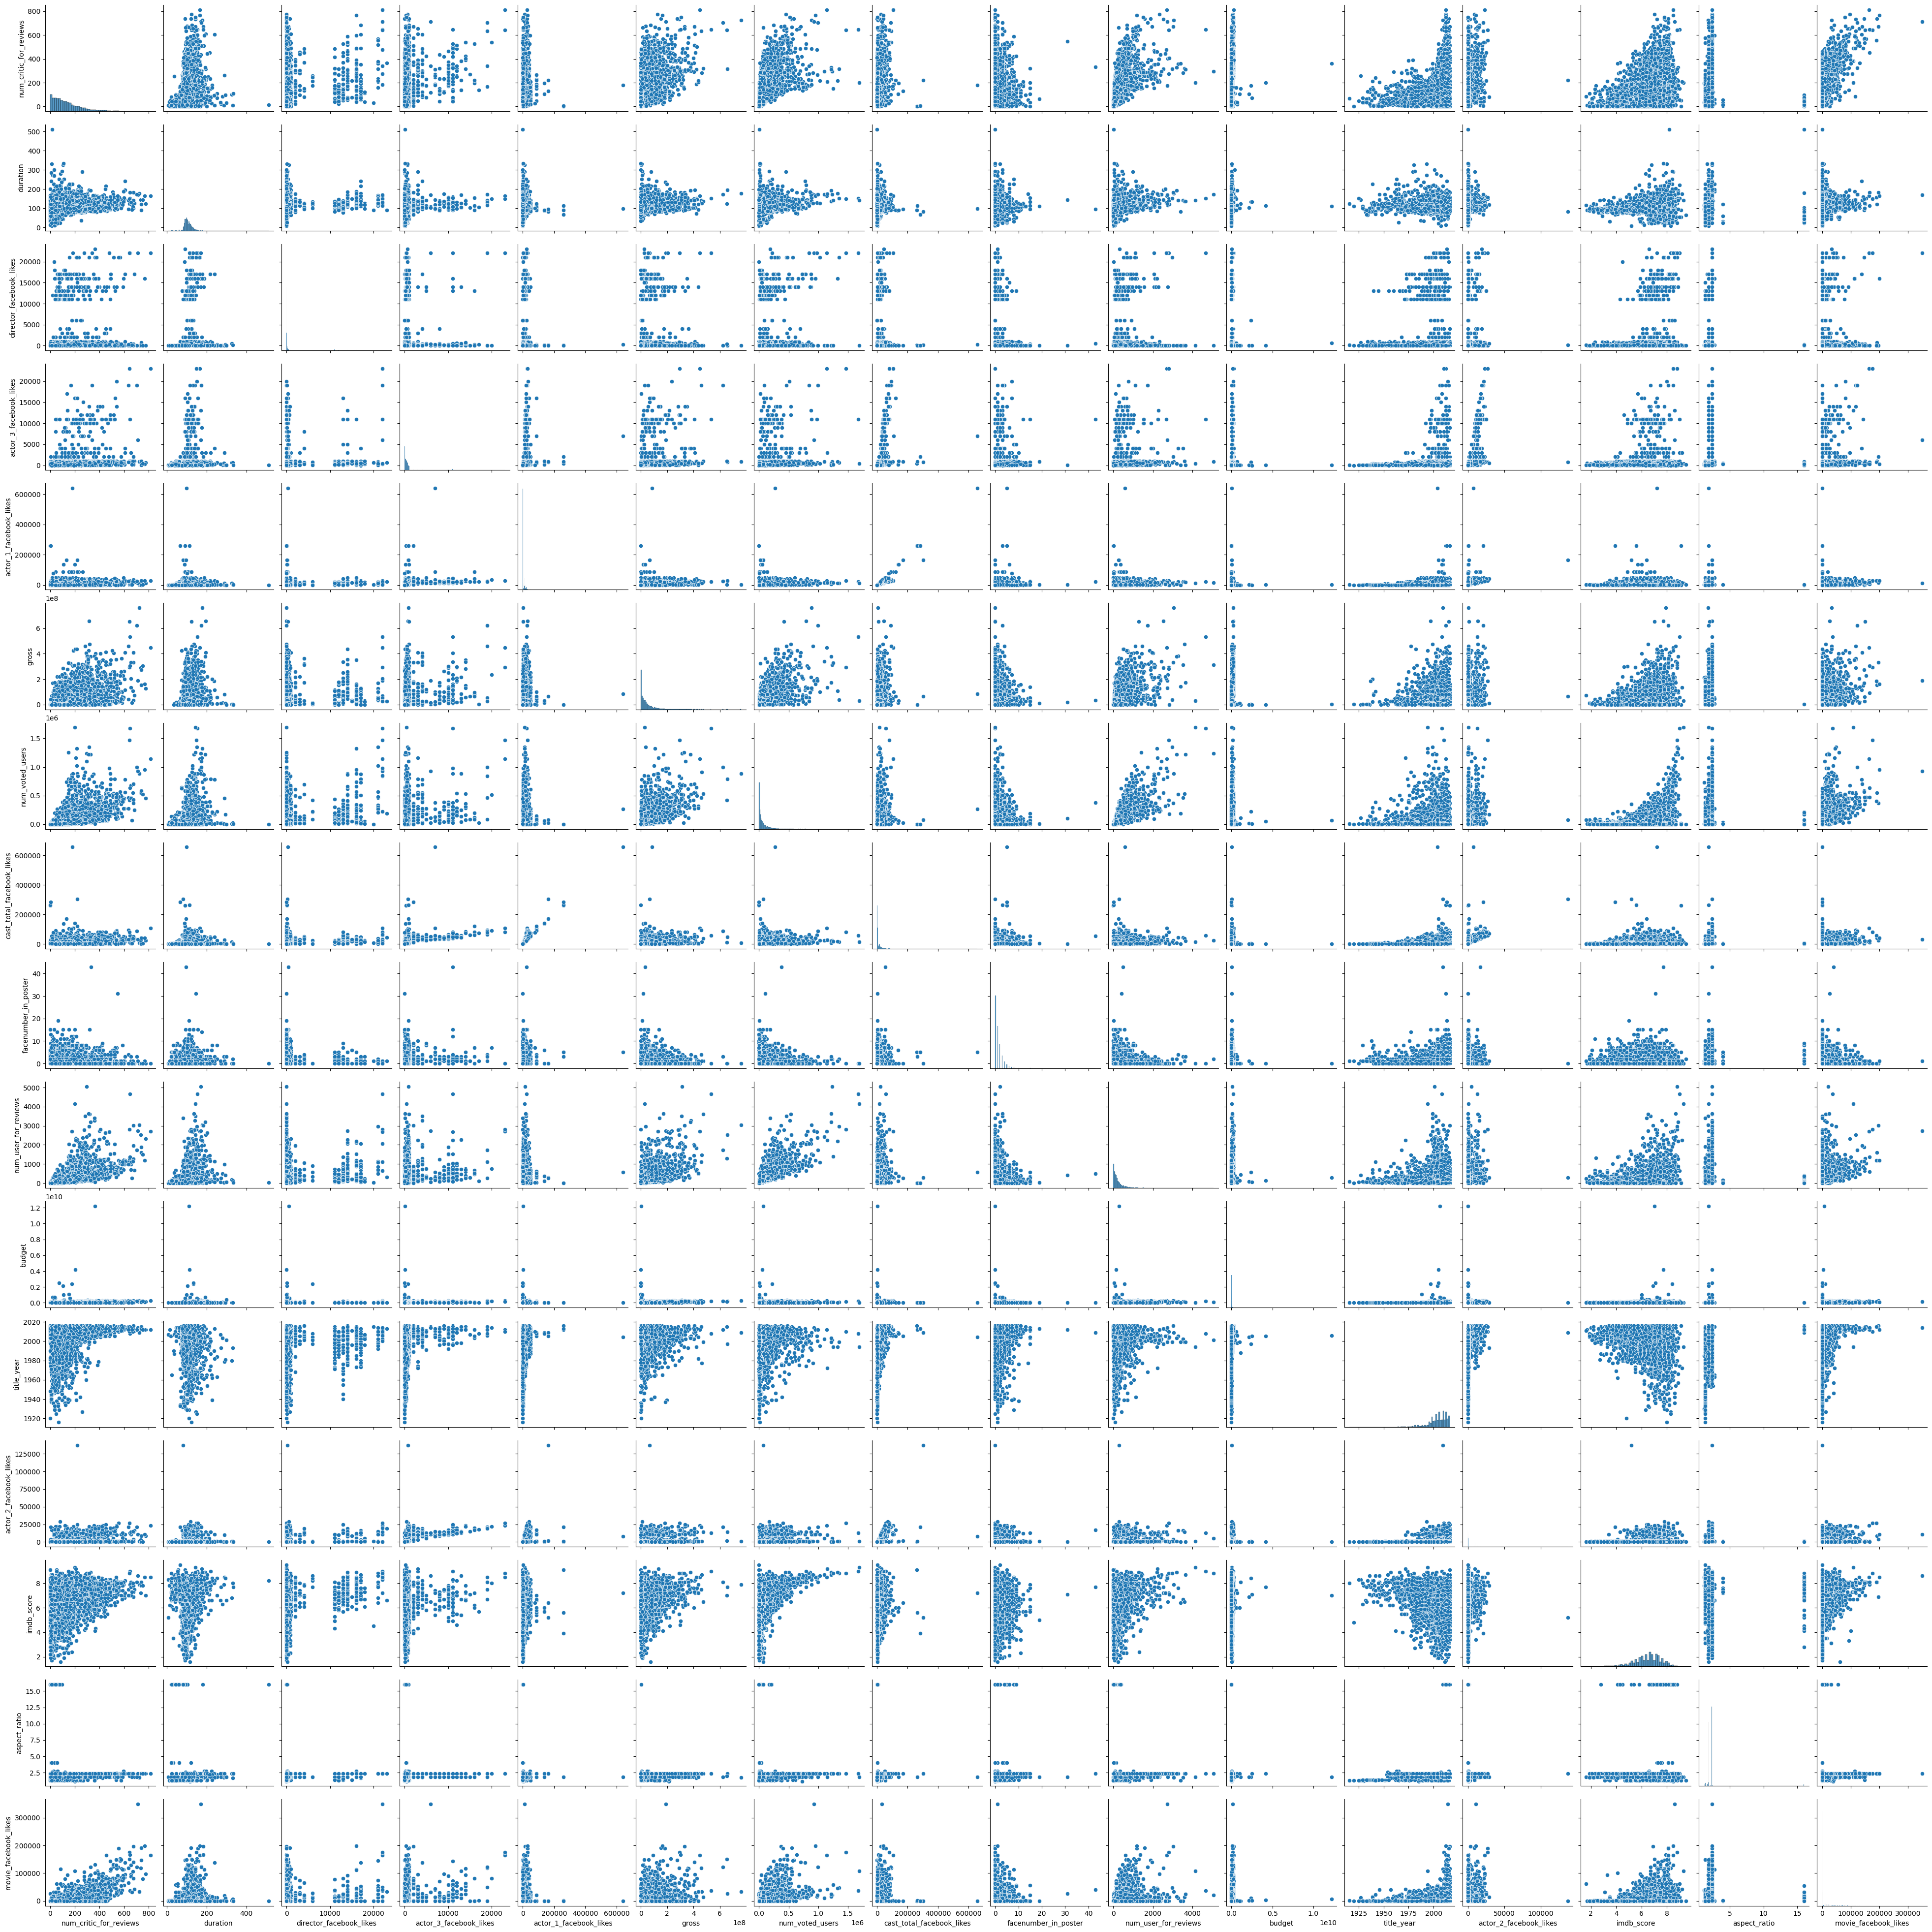

In [15]:
#Scatter plot of the Data
sns.pairplot(Data)

<Axes: ylabel='imdb_score'>

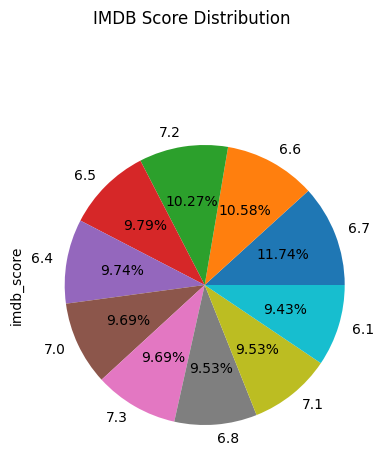

In [16]:
#Pie plot for top 10 imdb scores
plt.subplots(figsize=(10,10))
plt.subplot(211)
plt.suptitle('IMDB Score Distribution')
Data['imdb_score'].value_counts(ascending=False).head(10).plot(kind='pie', autopct = "%0.2f%%")
#Around 11.74% of the data has imdb score which is 6.7

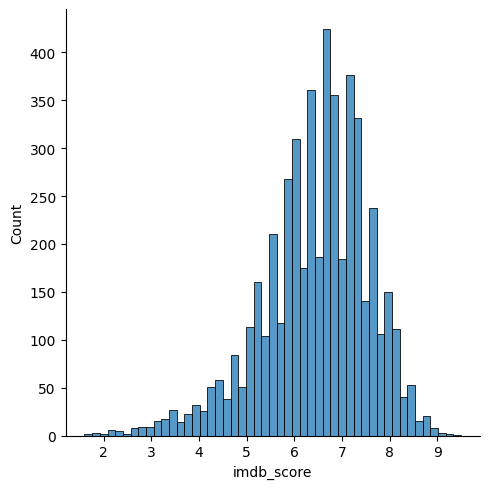

In [17]:
#Distribution plot
sns.displot(Data['imdb_score'])
#IMDB Score count is highest between scores 6 to 8

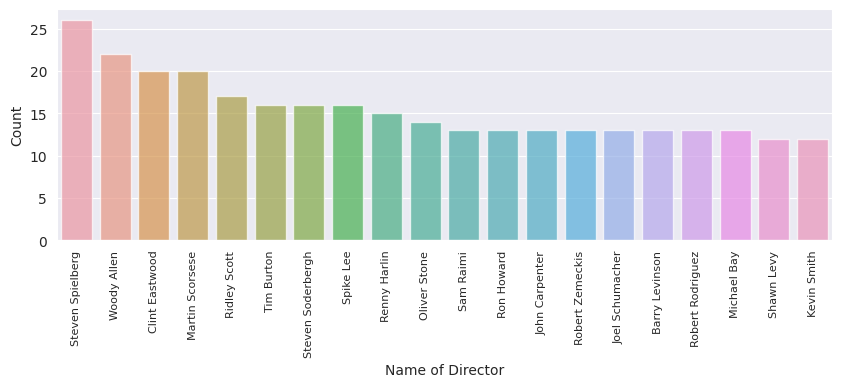

In [18]:
#Visualising director names in the dataset
sns.set_style("darkgrid")
ls=Data['director_name'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(10,3))
temp=sns.barplot(x=ls.index, y=ls.values, alpha=0.7)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Name of Director', fontsize=10)
temp.set_xticklabels(rotation=90, labels=ls.index, fontsize=8)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Belgium'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'China'),
  Text(9, 0, 'France'),
  Text(10, 0, 'New Line'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Hong Kong'),
  Text(14, 0, 'Czech Republic'),
  Text(15, 0, 'India'),
  Text(16, 0, 'Soviet Union'),
  Text(17, 0, 'South Korea'),
  Text(18, 0, 'Peru'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Russia'),
  Text(21, 0, 'Aruba'),
  Text(22, 0, 'Denmark'),
  Text(23, 0, 'Libya'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'South Africa'),
  Text(26, 0, 'Iceland'),
  Text(27, 0, 

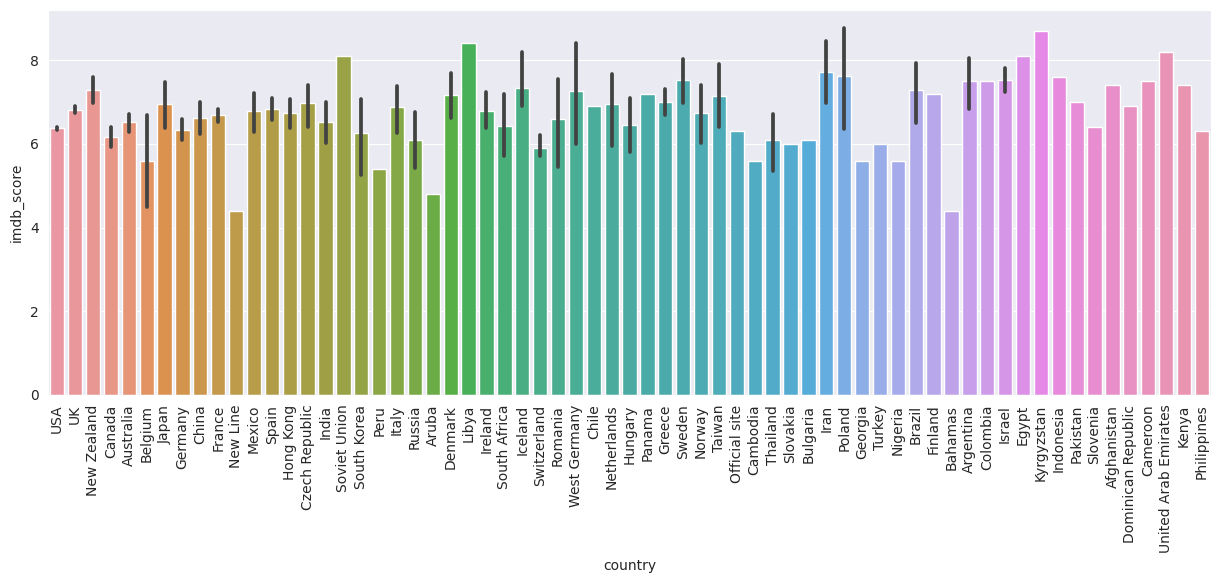

In [19]:
#Visualising barplot of imdb scores of each country
plt.figure(figsize=(15,5))
sns.barplot(x='country',y='imdb_score', data=Data)
plt.xticks(rotation=90)

Highest imdb score is of Krygyzstan followed by Libya and lowest is of New Line followed by Bahamas

**Cleaning the Data**

In [20]:
#Dropping all null values in the dataset
Data.dropna(inplace=True)

In [21]:
Data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

**Dropping Irrelevant Columns**

In [22]:
Data=Data.drop(columns=['movie_title','actor_3_name','facenumber_in_poster','plot_keywords','movie_imdb_link','aspect_ratio','color','language'])

**Encoding Categorical Variables to Numerical Variables**

In [24]:
cat=['director_name','actor_1_name','actor_2_name','genres','country','content_rating']
Encoder=LabelEncoder()
for i in cat:
  Data[i]=Encoder.fit_transform(Data[i])
Data.dtypes

director_name                  int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int64
actor_1_facebook_likes       float64
gross                        float64
genres                         int64
actor_1_name                   int64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int64
content_rating                 int64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

**Distribution plot of the data**

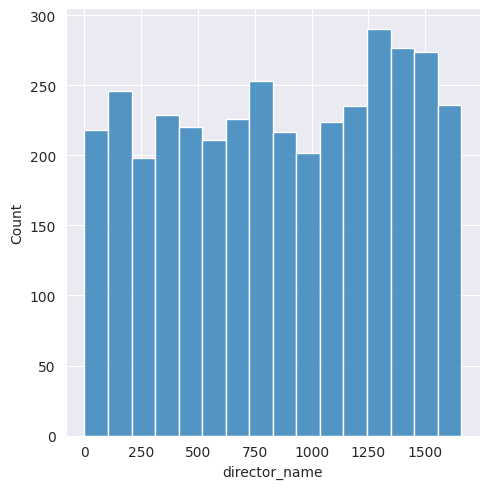

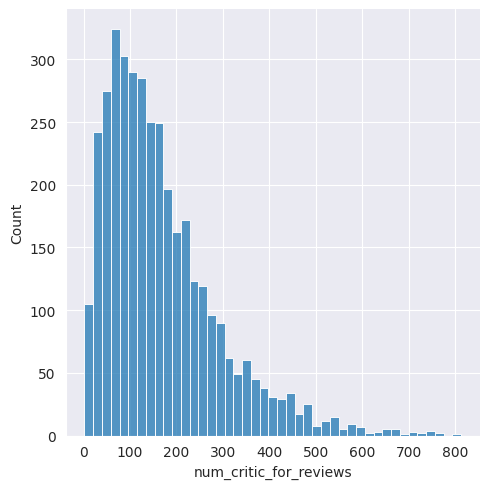

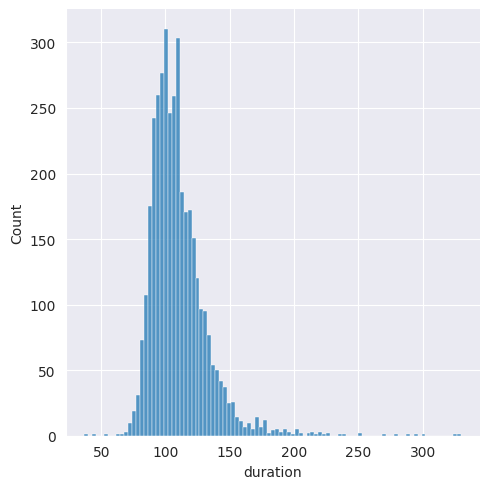

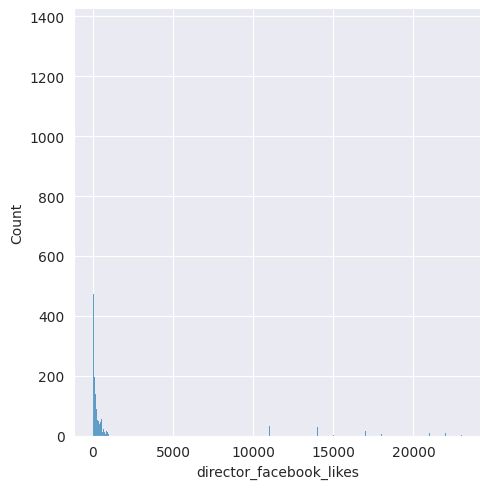

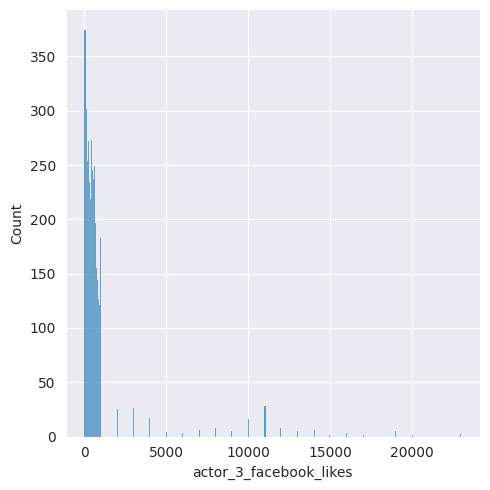

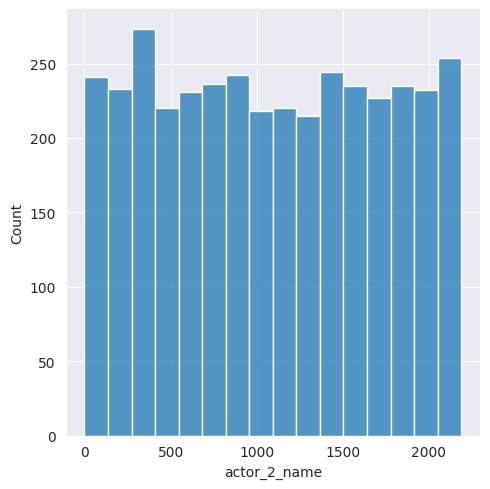

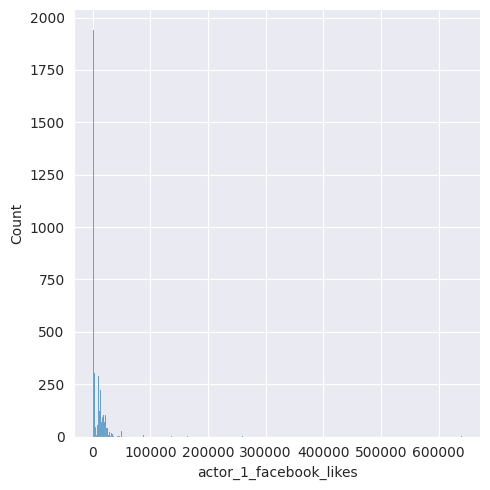

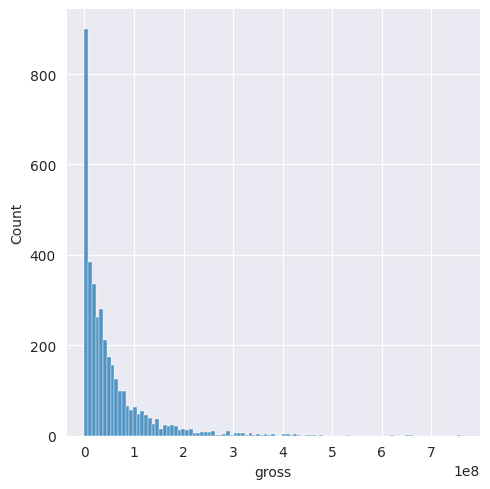

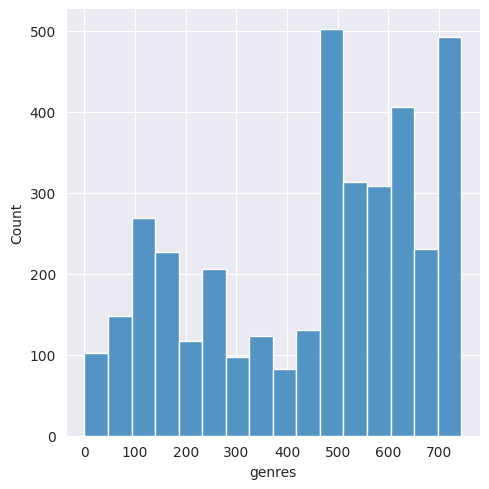

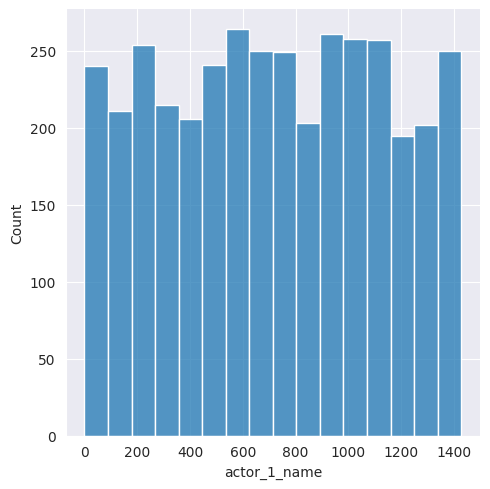

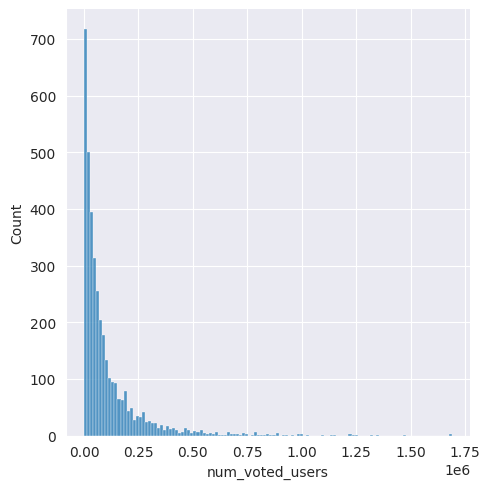

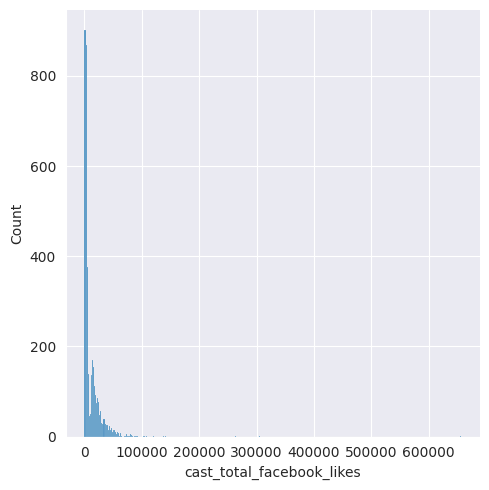

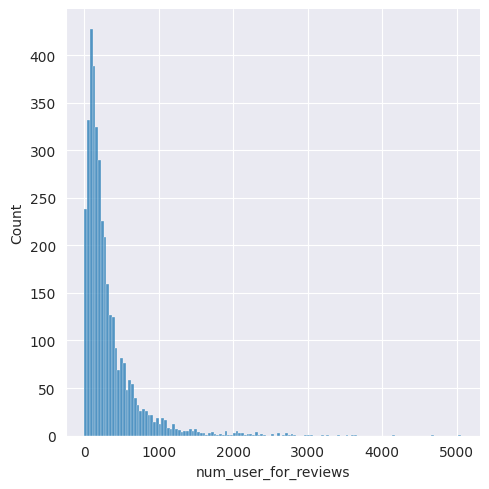

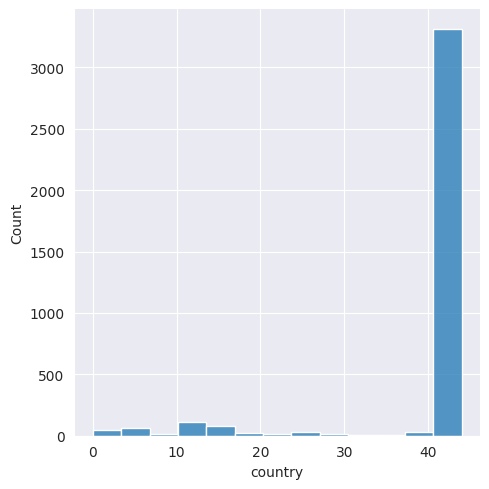

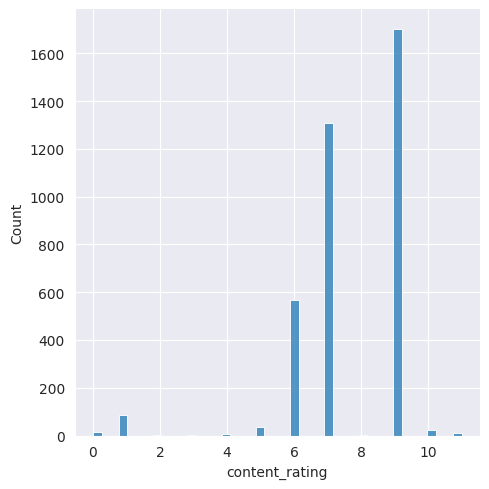

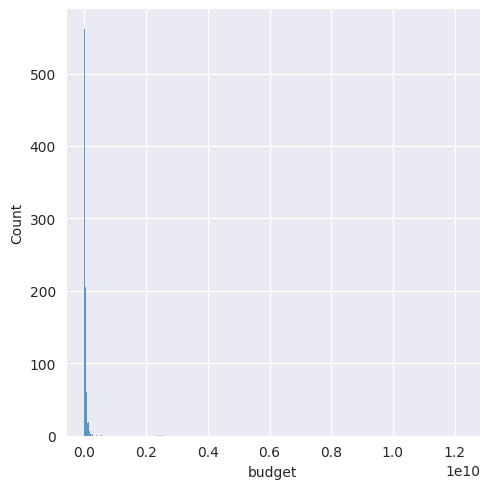

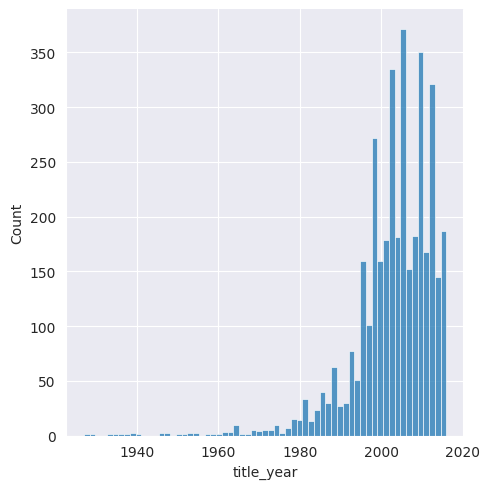

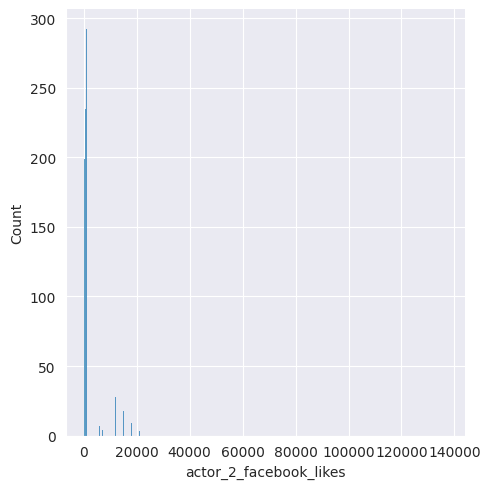

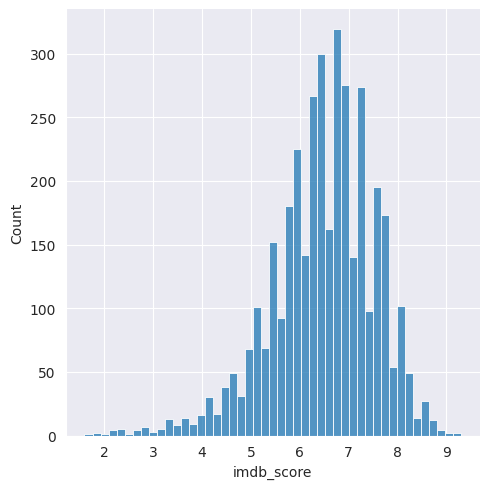

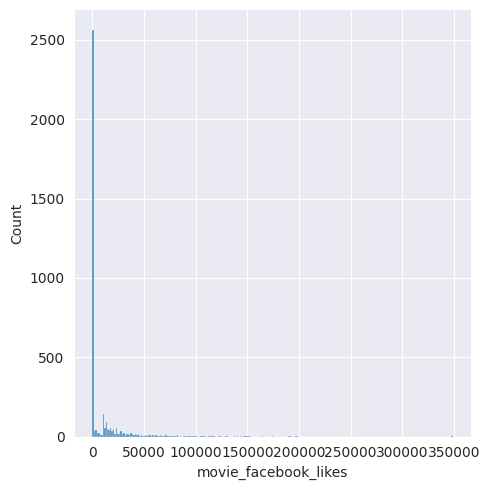

In [25]:
index=0
for i in range(4):
  for j in range(5):
    sns.displot(Data[Data.columns[index]])
    index=index+1

plt.tight_layout()

**Log Transformation on Skewed Data**

In [28]:
  #applying log transformation in skewed features
  for i in Data.columns:
    Data[i]=np.log(Data[i]+1)

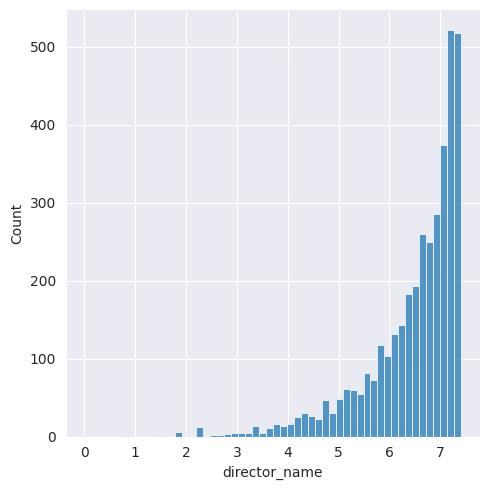

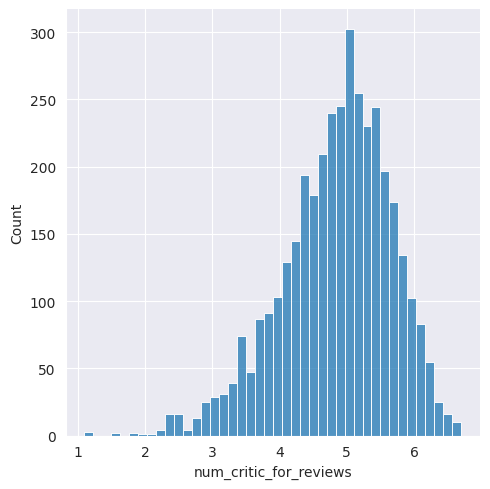

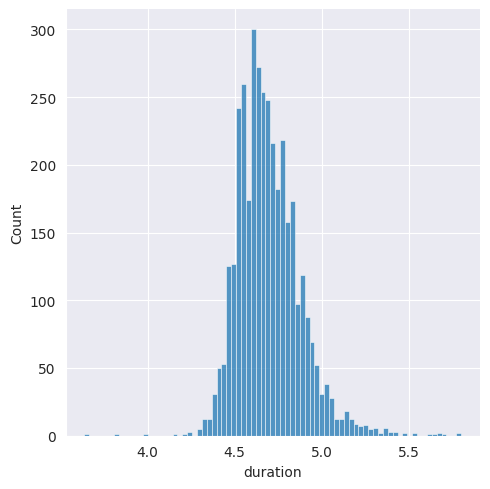

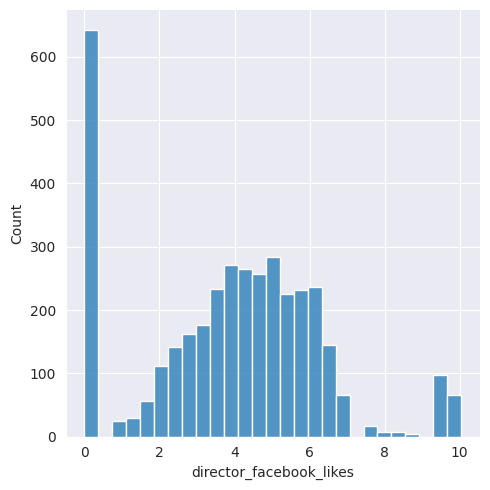

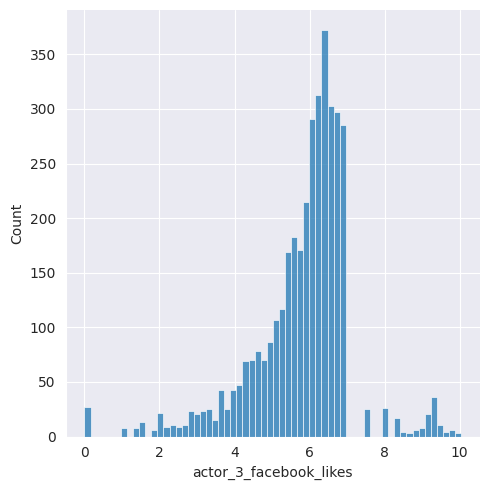

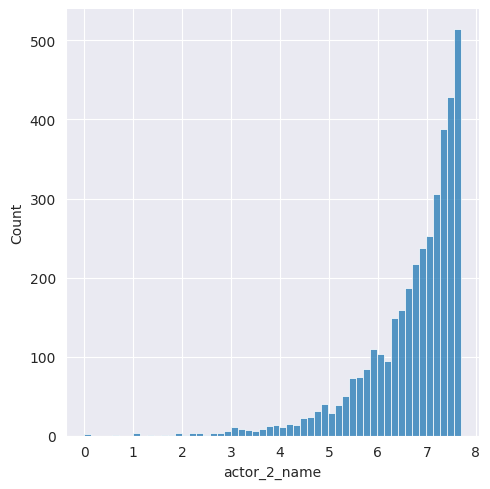

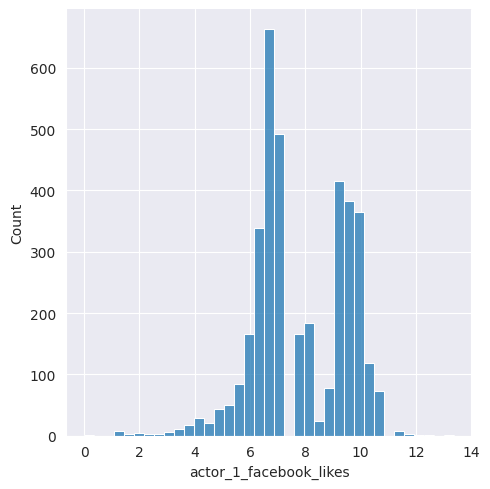

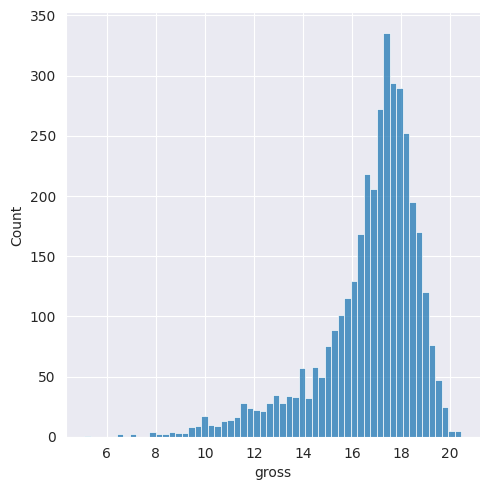

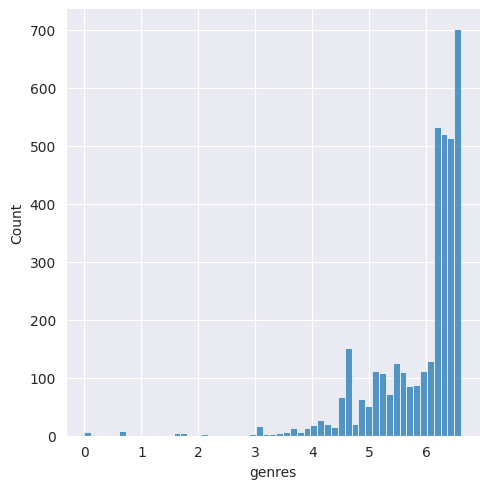

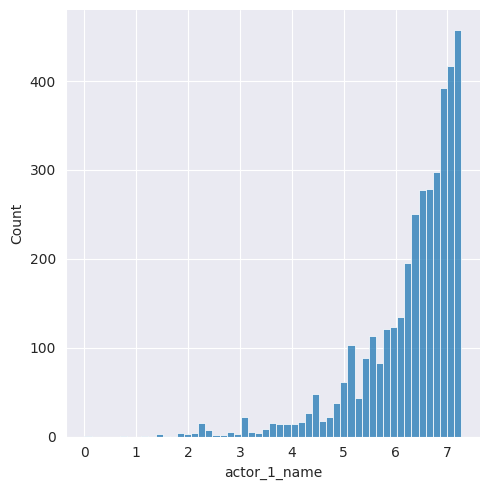

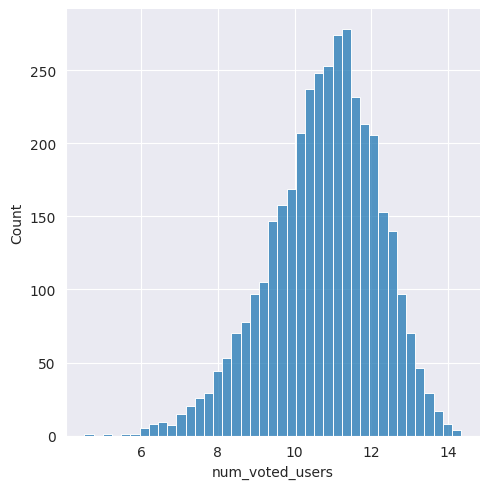

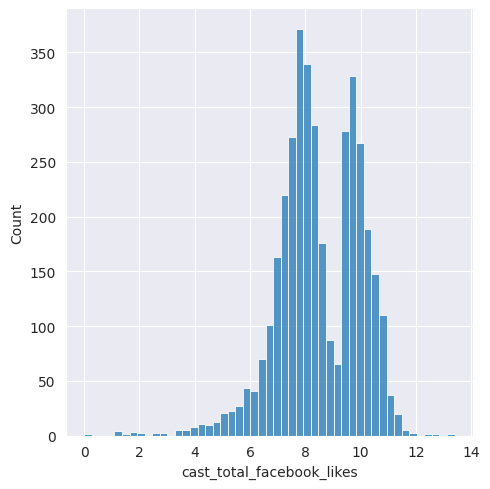

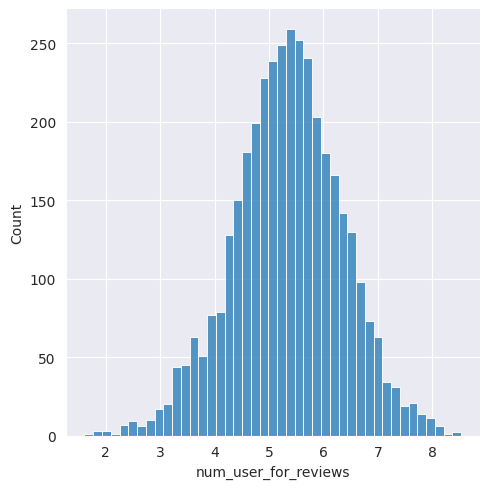

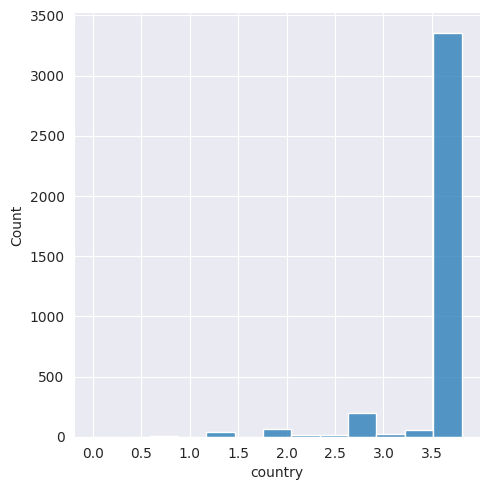

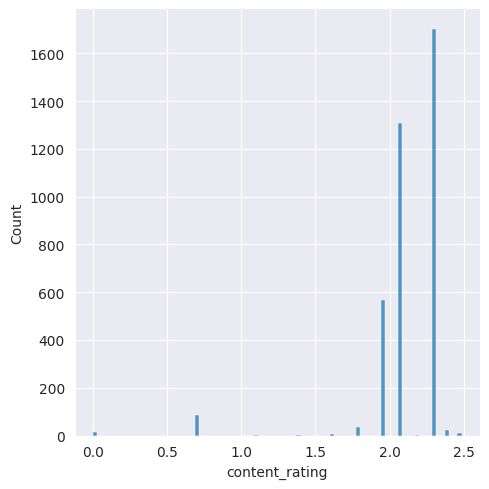

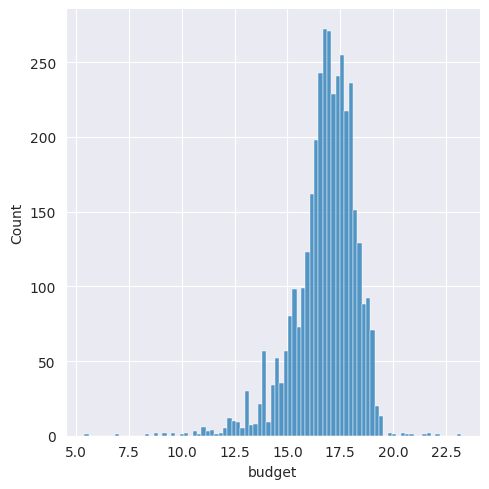

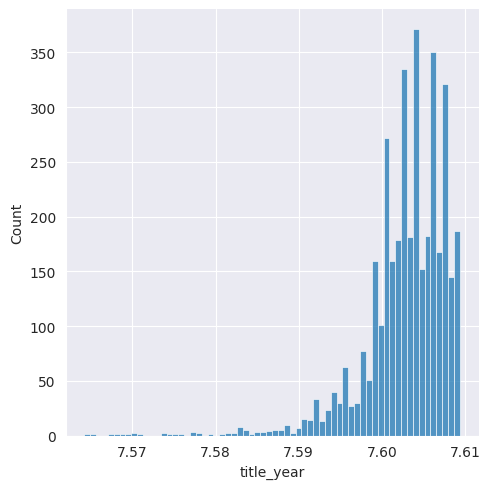

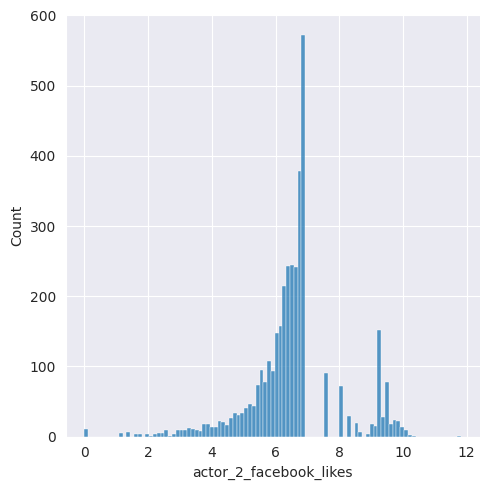

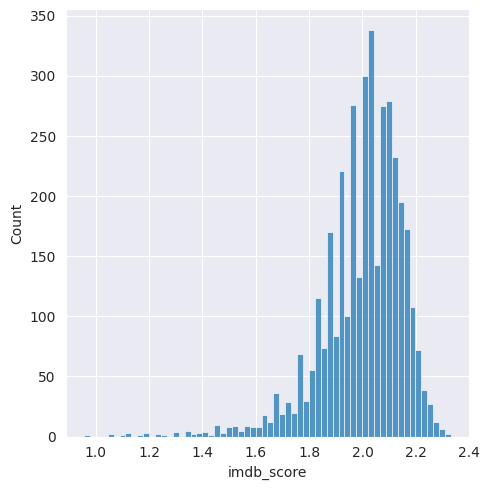

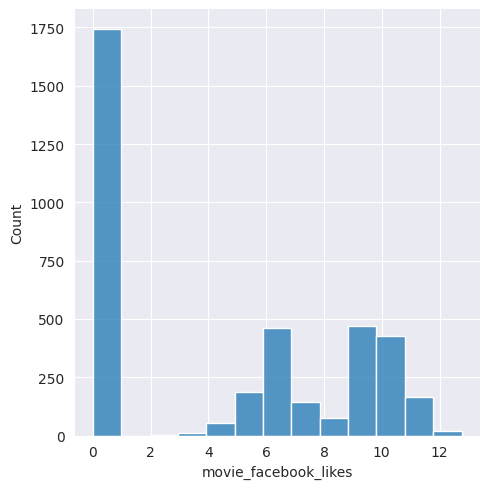

In [29]:
index=0
for i in range(4):
  for j in range(5):
    sns.displot(Data[Data.columns[index]])
    index=index+1

**Splitting the Dataset**

In [31]:
X=Data.drop(['imdb_score'],axis=1)
Y=Data['imdb_score']
X.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,6.431331,6.584791,5.187386,0.000000,6.752270,6.910751,6.908755,20.449494,4.521789,5.247024,13.694704,8.483636,8.024535,3.78419,2.079442,19.283571,7.605890,6.842683,10.404293
1,6.289716,5.713733,5.135798,6.335054,6.908755,7.373374,10.596660,19.550159,4.454347,6.533789,13.063082,10.786242,7.122060,3.78419,2.079442,19.519293,7.604894,8.517393,0.000000
2,7.241366,6.401917,5.003946,0.000000,5.087596,7.493317,9.305741,19.114199,4.682131,5.556828,12.527681,9.367430,6.902743,3.76120,2.079442,19.316769,7.608871,5.976351,11.350418
3,5.529429,6.701960,5.105945,9.998843,10.043293,5.945421,10.203629,19.920595,5.497168,7.201171,13.950337,11.578339,7.901748,3.78419,2.079442,19.336971,7.607381,10.043293,12.007628
5,4.143135,6.137727,4.890349,6.165418,6.274762,7.516433,6.463029,18.106774,4.663439,5.780744,12.265308,7.535830,6.605298,3.78419,2.079442,19.390323,7.607381,6.450470,10.085851


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=48)

**Model Fitting**

Linear Regression Model

In [52]:
model=LinearRegression()
model=model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",RMSE)
print("R-squared value on train: ",model.score(X_train,Y_train))
print("R-squared value on test: ",model.score(X_test,Y_test))
print("Accuracy: ",100-np.mean((metrics.mean_absolute_error(Y_test,Y_pred)/Y_test)*100))

RMSE:  0.11709248069975979
R-squared value on train:  0.4081966243671368
R-squared value on test:  0.4022447406368902
Accuracy:  95.77795764281444


Decision Tree Model

In [56]:
modelTree=DecisionTreeRegressor()
modelTree=modelTree.fit(X_train,Y_train)
Y_pred = modelTree.predict(X_test)

RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",RMSE)
print("R-squared value on train: ",modelTree.score(X_train,Y_train))
print("R-squared value on test: ",modelTree.score(X_test,Y_test))
print("Accuracy: ",100-np.mean((metrics.mean_absolute_error(Y_test,Y_pred)/Y_test)*100))

RMSE:  0.14774407004196363
R-squared value on train:  1.0
R-squared value on test:  0.048331905377935525
Accuracy:  94.91379417771041


Random Forest Model

In [57]:
RF=RandomForestRegressor().fit(X_train,Y_train)
Y_pred=RF.predict(X_test)

RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",RMSE)
print("R-squared value on train: ",RF.score(X_train,Y_train))
print("R-squared value on test: ",RF.score(X_test,Y_test))
print("Accuracy: ",100-np.mean((metrics.mean_absolute_error(Y_test,Y_pred)/Y_test)*100))

RMSE:  0.10440376559774013
R-squared value on train:  0.9282166253949187
R-squared value on test:  0.5247767086736131
Accuracy:  96.41685446092528


K-Nearest Neighbor Regression Model

In [60]:
KNN=KNeighborsRegressor().fit(X_train,Y_train)
Y_pred=KNN.predict(X_test)

RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",RMSE)
print("R-squared value on train: ", KNN.score(X_train,Y_train))
print("R-squared value on test: ", KNN.score(X_test,Y_test))
print("Accuracy: ",100-np.mean((metrics.mean_absolute_error(Y_test,Y_pred)/Y_test)*100))

RMSE:  0.12860391440391028
R-squared value on train:  0.504367442098937
R-squared value on test:  0.2789360764123524
Accuracy:  95.30217164819425
